<font color="#002856"><h1 align="left">Algoritmos de optimización</h1></font>
<font color="#002856"><h2 align="left">VC-4 Descenso por gradiente</h2></font> 

#### Profesor: Juan Francisco Vallalta Rueda
---

In [19]:
!pip install bokeh

In [20]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns
import bokeh.plotting as bp
import matplotlib.pyplot as plt
#from sklearn.datasets.samples_generator import make_regression 
from scipy import stats 
from bokeh.models import  WheelZoomTool, ResetTool, PanTool
%matplotlib inline 

## ¿Qué es "aprender de los datos"?

>En general **Learning from Data** es una disciplina científica que se ocupa del diseño y desarrollo de algoritmos que permiten a las computadoras inferir (a partir de datos) un modelo que permite una *representación compacta* (aprendizaje no supervisado) y/o *buena generalización* (aprendizaje supervisado).

Esta es una tecnología importante porque permite que los sistemas computacionales mejoren su rendimiento de forma adaptativa con la experiencia acumulada a partir de los datos observados.

La mayoría de estos algoritmos se basan en la *solución iterativa* de un problema matemático que involucra datos y modelo. Si hubiera una solución analítica al problema, esta debería ser la adoptada, pero no es así en la mayoría de los casos.

Entonces, la estrategia más común para **aprender de datos** se basa en resolver un sistema de ecuaciones como una forma de encontrar una serie de parámetros del modelo que minimice un problema matemático. Esto se llama **optimización**.

Una técnica importante para resolver problemas de optimización es el **descenso de gradiente**.

## Descenso del gradiente para minimización de una función: 1-D

Supongamos que tenemos una función $f: \Re \rightarrow \Re$. Por ejemplo: 

$$f(x) = x^2$$

Nuestro objetivo es encontrar el argumento  $x$ que minimiza la función (para maximizar, consideremos $-f(x)$). Para este fin, el concepto crítico es la **derivada**.

La derivada $f$ con respecto a una variable $x$, $f'(x)$ o $\frac{\mathrm{d}f}{\mathrm{d}x}$,  es una medida de la tasa de cambio de la función respecto al cambio de la variable. Se define como el siguiente límite:


$$ f'(x) = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h} $$

La derivada especifica cómo escalar un pequeño cambio en la entrada para obtener el cambio correspondiente en la salida:

$$ f(x + h) \approx f(x) + h f'(x)$$

In [12]:
# Derivada numérica en el punto x = 2.0

def f(x):
    return x**2

def fin_dif(x, f, h = 0.000001):
    return (f(x+h) - f(x))/h

x = 2.0
print(fin_dif(x,f))

4.0000010006480125


El límite cuando $h$ tiende a cero, si existe, debe representar la **pendiente de la línea tangente** a $(x, f(x))$.

Para valores que no son cero es solo una aproximación.

In [13]:
for h in np.linspace(0.0, 1.0 , 5):
    print("{:3.6f}".format(f(5+h)), "{:3.6f}".format(f(5)+h*fin_dif(5,f)))

25.000000 25.000000
27.562500 27.500000
30.250000 30.000001
33.062500 32.500001
36.000000 35.000001


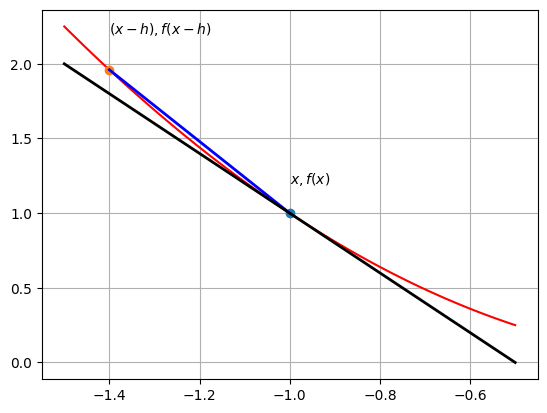

In [14]:
x = np.linspace(-1.5,-0.5, 100)
f = [i**2 for i in x]
plt.plot(x,f, 'r-')
plt.plot([-1],[1],'o')
plt.plot([-1.4],[1.96],'o') # h=0.4
plt.text(-1.0, 1.2,'$x,f(x)$')
plt.text(-1.4, 2.2,'$(x-h),f(x-h)$')
plt.plot([-1.4, -1.0], [1.96, 1.0], 'b-', lw=2) #la derivada con h=0.4
plt.plot([-1.5, -0.5], [2, 0.0], 'k-', lw=2) #linea tangente (y=-2x-1)
plt.grid()
#plt.show

Se puede demostrar que la "fórmula de la diferencia centrada" es mejor cuando se calculan derivadas numéricas:

$$ \lim_{h \rightarrow 0} \frac{f(x + h) - f(x - h)}{2h} $$

El error en la aproximación de "diferencias finitas" se puede derivar del teorema de Taylor y, suponiendo que $f$ es diferenciable, es $O(h)$. En el caso de "diferencia centrada" el error es $O(h^2)$.

La derivada nos dice qué tan inclinada sería la recta tangente a la gráfica en un punto dado $(x, f(x))$. Esa inclinación o pendiente varía de un punto a otro: algunas partes del gráfico son más planas y otras partes tienen una pendiente más pronunciada.
Examinando la derivada en un punto dado $(x, f(x))$, podemos saber si la función $f$ es creciente o decreciente en ese punto, y en qué medida.

Podemos seguir estos pasos para **disminuir** el valor de la función:

+ Comience desde un valor aleatorio de $x$.
+ Calcula la derivada $f'(x) = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x - h)}{2h}$.
+ Da un pequeño paso en la dirección **opuesta** de la derivada, porque sabemos que $f(x - h \mbox{ sign}(f'(x))$ < $f(x)$ para valores suficientemente pequeños $h$.

La búsqueda de los mínimos termina cuando la derivada es cero porque no tenemos más información sobre en qué dirección movernos. $x$ es un punto crítico o estacionario si $f'(x)=0$.

 + Un **mínimo (máximo)** es un punto crítico donde $f(x)$ es menor (mayor) que en todos los puntos vecinos.
 + Hay una tercera clase de puntos críticos: **puntos de silla**.

Si $f$ es una **función convexa**, este debería ser el mínimo (máximo) de nuestras funciones. En otros casos podría ser un mínimo local (máximo) o un punto silla.

In [21]:
W = 400
H = 250
bp.output_notebook()

Loading BokehJS ...

In [24]:
x = np.linspace(-15,15,100)
y = x**2

TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]

s1 = bp.figure(width=W, height=H, 
               title='Local minimum of function',  
               tools=TOOLS)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.circle(0, 0, size =10, color="orange")
s1.title.text_font_size = '12pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"

bp.show(s1)

In [27]:
x = np.linspace(-15,15,100)
y = -x**2

TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]


s1 = bp.figure(width=W, frame_height=H, 
               title='Local maximum of function',  
               tools=TOOLS)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.circle(0, 0, size =10, color="orange")
s1.title.text_font_size = '12pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"

bp.show(s1)

In [41]:
x = np.linspace(-15,15,100)
y = x**3

TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]


s1 = bp.figure(width=W, plot_height=H, 
               title='Saddle point of function',  
               tools=TOOLS)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.circle(0, 0, size =10, color="orange")
s1.title.text_font_size = '12pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"

bp.show(s1)

Hay dos problemas con las derivadas numéricas:
+ Es aproximado.
+ Es muy lento de evaluar (dos evaluaciones de funciones: $f(x + h) , f(x - h)$ ).

¡Nuestro conocimiento de Cálculo podría ayudar!

Sabemos que podemos obtener una expresión analítica de la derivada de algunas funciones.

Por ejemplo, supongamos que tenemos una función cuadrática simple, $f(x)=x^2−6x+5$, y queremos encontrar el mínimo de esta función.

#### Primer enfoque
Podemos resolver esto analíticamente usando cálculo, encontrando la derivada  $f'(x)  =  2x-6$ e igualándola a cero:

\begin{equation}
\begin{split}
2x-6  & = & 0 \\
2x  & = & 6 \\
x & = & 3 \\
\end{split}
\end{equation}

In [42]:
x = np.linspace(-10,20,100)
y = x**2 - 6*x + 5
 
TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]


s1 = bp.figure(width=W, plot_height=H, 
               tools=TOOLS)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.circle(3, 3**2 - 6*3 + 5, size =10, color="orange")
s1.title.text_font_size = '12pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"

bp.show(s1)

#### Segundo enfoque

Para encontrar el mínimo local usando **descenso de gradiente**: comienza en un punto aleatorio y avanza en la dirección del **descenso** más pronunciado en relación con la derivada:

+ Comience desde un valor aleatorio de $x$.
+ Calcular la derivada $f'(x)$ analíticamente.
+ Da un pequeño paso en la dirección **opuesta** de la derivada.

En este ejemplo, supongamos que empezamos en $x=15$. La derivada en este punto es $2*15−6=24$.

Debido a que estamos usando el descenso de gradiente, necesitamos restar el gradiente de nuestra coordenada $x$: $f(x - f'(x))$. Sin embargo, observe que $15−24$ nos da $−9$, superando claramente el objetivo de $3$.

In [43]:
x = np.linspace(-10,20,100)
y = x**2 - 6*x + 5
start = 15

TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]


s1 = bp.figure(width=W, plot_height=H, 
               tools=TOOLS)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.circle(start, start**2 - 6*start + 5, size =10, color="orange")

d = 2 * start - 6
end = start - d

s1.circle(end, end**2 - 6*end + 5, size =10, color="red")
s1.title.text_font_size = '12pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"

bp.show(s1)

Para arreglar esto, multiplicamos el gradiente por un tamaño de paso. Este tamaño de paso (a menudo llamado **alfa** o **velocidad de aprendizaje**) debe elegirse con cuidado, ya que un valor demasiado pequeño dará como resultado un tiempo de cálculo prolongado, mientras que un valor demasiado grande no le dará el resultado correcto. (sobreimpulsando) o incluso dejar de converger.

En este ejemplo, estableceremos el tamaño del paso en 0,01, lo que significa que restaremos $24 × 0,01 $ de $15 $, que es $14,76 $.

Este es ahora nuestro nuevo mínimo local temporal: continuamos con este método hasta que no veamos un cambio después de restar el tamaño del paso derivado o hasta que hayamos completado un número preestablecido de iteraciones.

In [44]:
old_min = 0
temp_min = 15 #initial random point
step_size = 0.01
precision = 0.0001
 
def f_derivative(x):
    return 2*x -6

mins = []
cost = []

while abs(temp_min - old_min) > precision:
    old_min = temp_min 
    gradient = f_derivative(old_min) 
    move = gradient * step_size
    temp_min = old_min - move
    cost.append((3-temp_min)**2) #squared distance from temp_min to the true local minimum
    mins.append(temp_min)

# rounding the result to 2 digits because of the step size
print("Local minimum occurs at", round(temp_min,2))

Local minimum occurs at 3.0


Una característica importante del descenso de gradiente es que **debería haber una mejora visible con el tiempo**: En este ejemplo, simplemente trazamos la distancia al cuadrado desde los mínimos locales calculados por el descenso de gradiente y el verdadero mínimo local, ``costo`` , contra la iteración durante la cual se calculó. Como podemos ver, la distancia se hace más pequeña con el tiempo, pero apenas cambia en iteraciones posteriores.

In [45]:
OOLS = [WheelZoomTool(), ResetTool(), PanTool()]

x = list(range(len(cost)))
y = cost
#x, y = (zip(*enumerate(cost)))
s1 = bp.figure(width=W, 
               height=H, 
               title='Squared distance to true local minimum',  
#                title_text_font_size='14pt', 
               tools=TOOLS,
               x_axis_label = 'Iteration',
               y_axis_label = 'Distance'
)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.title.text_font_size = '16pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"
bp.show(s1)

## De derivadas a gradiente: minimización de funciones $n$-dimensionales.

Consideremos una función $n$-dimensional $f: \Re^n \rightarrow \Re$. Por ejemplo:

$$f(\mathbf{x}) = \sum_{n} x_n^2$$

Nuestro objetivo es encontrar el argumento $\mathbf{x}$ que minimice esta función.

El **gradiente** de $f$ es el vector cuyas componentes son las derivadas parciales de $n$ de $f$. Por lo tanto, es una función con valores vectoriales.

El gradiente apunta en la dirección de la mayor tasa de **aumento** de la función.

$$\nabla {f} = (\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_n})$$

In [31]:
def f(x):
    return sum(x_i**2 for x_i in x)

def fin_dif_partial_centered(x, f, i, h=1e-6):
    w1 = [x_j + (h if j==i else 0) for j, x_j in enumerate(x)]
    w2 = [x_j - (h if j==i else 0) for j, x_j in enumerate(x)]
    return (f(w1) - f(w2))/(2*h)

def gradient_centered(x, f, h=1e-6):
    return[round(fin_dif_partial_centered(x,f,i,h), 10) for i,_ in enumerate(x)]

x = [1.0,1.0,1.0]

print(f(x), gradient_centered(x,f))

3.0 [2.0000000001, 2.0000000001, 2.0000000001]


La función que hemos evaluado, $f({\mathbf x}) = x_1^2+x_2^2+x_3^2$, es $3$ en $(1,1,1)$ y el vector gradiente en este punto es $(2,2,2)$.

Luego, podemos seguir estos pasos para maximizar (o minimizar) la función:

+ Empezar desde un vector $\mathbf{x}$ aleatorio.
+ Calcular el vector gradiente.
+ Da un pequeño paso en la dirección opuesta al vector de gradiente.

> Es importante tener en cuenta que este cálculo de gradiente es muy costoso: si $\mathbf{x}$ tiene una dimensión $n$, tenemos que evaluar $f$ en $2*n$ puntos.

### Cómo usar el gradiente.

$f(x) = \sum_i x_i^2$, toma su valor mínimo cuando todos los $x$ son 0.

Vamos a comprobarlo por $ n = 3 $:

Comencemos eligiendo un vector aleatorio y luego dando un paso en la dirección opuesta al vector de gradiente. Nos detendremos cuando la diferencia entre la nueva solución y la solución anterior sea menor que un valor de tolerancia.

In [28]:
# choosing a random vector

import random
import numpy as np

x = [random.randint(-10,10) for i in range(3)]
x

[2, 9, -9]

In [32]:
def step(x,grad,alpha):
    return [x_i - alpha * grad_i for x_i, grad_i in zip(x,grad)]

def euc_dist(v1,v2):
    import numpy as np
    import math
    v = np.array(v1)-np.array(v2)
    return math.sqrt(sum(v_i ** 2 for v_i in v))

tol = 1e-15
alpha = 0.01
while True:
    grad = gradient_centered(x,f)
    next_x = step(x,grad,alpha)
    if euc_dist(next_x,x) < tol: #calculate Euclidean distance in n dimensions
        break
    x = next_x
print([round(i,10) for i in x])

[0.0, 0.0, 0.0]


### alfa

El tamaño del paso, **alfa**, es un concepto delicado: si es demasiado pequeño, convergeremos lentamente a la solución, si es demasiado grande, podemos divergir de la solución.

Hay varias políticas a seguir al seleccionar el tamaño del paso:

+ Pasos de tamaño constante. En este caso, el paso de tamaño determina la precisión de la solución.
+ Disminución del tamaño de los pasos con iteraciones.
+ En cada iteración, seleccione el paso óptimo.

La última política es buena, pero demasiado costosa. En este caso, consideraremos un conjunto fijo de valores (en cada iteración):

In [33]:
step_size = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

## Aprender de los datos

En general, tenemos:

+ Un conjunto de datos $(\mathbf{x},y)$.
+ Una función de destino $f_\mathbf{w}$, que queremos minimizar, que representa la discrepancia entre nuestros datos y el modelo que queremos ajustar. El modelo está representado por un conjunto de parámetros $\mathbf{w}$.
+ El gradiente de la función objetivo, $g_f$.


En el caso más común, $f_\mathbf{w}$ representa los errores de un modelo de representación de datos $M$. Ajustar el modelo es encontrar los parámetros óptimos $\mathbf{w}$ que minimicen la siguiente expresión:

$$ f_\mathbf{w} = \sum_{i} (y_i - M(\mathbf{x}_i,\mathbf{w}))^2 $$

Por ejemplo, $(\mathbf{x},y)$ puede representar:

+ $\mathbf{x}$: el comportamiento de un jugador de "Candy Crush"; $y$: pagos mensuales.
+ $\mathbf{x}$: datos del sensor sobre el motor de su automóvil; $y$: probabilidad de error del motor.
+ $\mathbf{x}$: datos financieros de un cliente bancario; $y$: valoración del cliente.

> Si $y$ es un valor real, se llama problema de *regresión*.

> Si $y$ es binario/categórico, se llama un problema de *clasificación*.

Supongamos que $M(x_i,\mathbf{w}) = w * x_i$.

### Descenso de gradiente por lotes (batch gradient descent)

Podemos implementar **descenso de gradiente** de la siguiente manera (*descenso de gradiente por lotes*):

In [34]:
#random.seed(10)

# find the value of w that minimizes the target (objective) function f_w: Sum((y-wx)**2)

x = range(10)
y = [2*i for i in x] # y = 2x

# f_target = Sum ((y - wx)**2)
def target_f(x,y,w):
    import numpy as np
    return np.sum((np.array(y) - np.array(x) * w)**2.0)

# gradient_f_target = Sum(2wx**2 - 2xy)
def gradient_f(x,y,w):
    import numpy as np
    return np.sum(2*w*(np.array(x)**2) - 2*np.array(x)*np.array(y))

def step(w,grad,alpha):
    return w - alpha * grad

def min_batch(target_f, gradient_f, x, y, toler = 1e-6):
    import random
    alphas = [100, 10, 1, 0.1, 0.001, 0.00001]
    w = random.random()
    val = target_f(x,y,w)
    print("First w:", w, "First Val:", val, "\n")
    i = 0
    while True:
        i += 1
        gradient = gradient_f(x,y,w)
        next_ws = [step(w, gradient, alpha) for alpha in alphas] #calculate the step for the different alphas
        next_vals = [target_f(x,y,w) for w in next_ws] #obtain next values per step
        min_val = min(next_vals) # select the minimum value
        next_w = next_ws[next_vals.index(min_val)] #save the step corresponding to the minimum value 
        next_val = next_vals[next_vals.index(min_val)] #save the minimum function value
        alpha_val = alphas[next_vals.index(min_val)]   #save the alpha leading to minimum function value
        print(i, "w: {:4.4f}".format(w), "Val:{:4.4f}".format(val), "Gradient:{:4.4f}".format(gradient), "Alpha:",alpha_val)        
        if (abs(val - next_val) < toler) or (i>200):
            return w
        else:
            w, val = next_w, next_val
            
min_batch(target_f, gradient_f, x, y)

First w: 0.9295114883140547 First Val: 326.59451129070317 

1 w: 0.9295 Val:326.5945 Gradient:-610.1785 Alpha: 0.001
2 w: 1.5397 Val:60.3873 Gradient:-262.3767 Alpha: 0.001
3 w: 1.8021 Val:11.1656 Gradient:-112.8220 Alpha: 0.001
4 w: 1.9149 Val:2.0645 Gradient:-48.5135 Alpha: 0.001
5 w: 1.9634 Val:0.3817 Gradient:-20.8608 Alpha: 0.001
6 w: 1.9843 Val:0.0706 Gradient:-8.9701 Alpha: 0.001
7 w: 1.9932 Val:0.0131 Gradient:-3.8572 Alpha: 0.001
8 w: 1.9971 Val:0.0024 Gradient:-1.6586 Alpha: 0.001
9 w: 1.9987 Val:0.0004 Gradient:-0.7132 Alpha: 0.001
10 w: 1.9995 Val:0.0001 Gradient:-0.3067 Alpha: 0.001
11 w: 1.9998 Val:0.0000 Gradient:-0.1319 Alpha: 0.001
12 w: 1.9999 Val:0.0000 Gradient:-0.0567 Alpha: 0.001
13 w: 2.0000 Val:0.0000 Gradient:-0.0244 Alpha: 0.001


1.9999572236743004

### Ejercicio:
+ 1. Considere un conjunto de 100 puntos de datos y explique el comportamiento del algoritmo.
+ 2. ¿Cómo podríamos solucionar este comportamiento?

### Descenso de gradiente estocástico

La última función evalúa la función objetivo $f_\mathbf{w}$ con respecto a cada parámetro/característica en cada paso.

Si el conjunto de datos es grande, esta estrategia es demasiado costosa. En este caso usaremos una estrategia llamada **SGD** (*Descenso de gradiente estocástico*). Consiste en reemplazar el gradiente real (calculado a partir de todo el conjunto de datos) por una estimación del mismo (calculado a partir de un subconjunto de datos seleccionado aleatoriamente).

Luego, calculamos la estimación del gradiente (y nos movemos hacia el mínimo) usando solo **una muestra de datos** (o una pequeña muestra de datos). Encontramos el mínimo iterando esta estimación de gradiente sobre el conjunto de datos.

Una iteración completa sobre el conjunto de datos se denomina **época**. Durante una época, los datos deben usarse en un orden aleatorio.

Si aplicamos este método tenemos algunas garantías para encontrar el mínimo.

In [35]:
import numpy as np
x = range(10)
y = [2*i for i in x]
data = list(zip(x,y))

def in_random_order(data):
    import random
    indexes = [i for i,_ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]
        
for (x_i,y_i) in in_random_order(data):
    print(x_i,y_i) 

0 0
5 10
7 14
2 4
1 2
4 8
3 6
6 12
9 18
8 16


In [36]:
def gradient_f_SGD(x,y,w):
    import numpy as np
    return 2*w*(np.array(x)**2) - 2*np.array(x)*np.array(y) #Note there is no sum of elements

def SGD(target_f, gradient_f, x, y, alpha_0=0.001):
    import numpy as np
    import random
    data = list(zip(x,y))
    w = random.random()
    alpha = alpha_0
    min_w, min_val = float('inf'), float('inf')
    iteration_no_increase = 0
    alpha_vect = []
    min_w_vect = []
    while iteration_no_increase < 100: 
        val = sum(target_f(x_i, y_i, w) for x_i,y_i in data) # full iteration of the global error with updated w
        if val < min_val: 
            # the global error gets lower with updated w
            min_w, min_val = w, val
            iteration_no_increase = 0
            alpha = alpha_0
        else:
            # the global error is not improving -> decrease alpha temporarily (until out of possible local minima)
            iteration_no_increase += 1
            alpha *= 0.9 #decrease alpha
        for x_i, y_i in in_random_order(data): 
            gradient_i = gradient_f(x_i, y_i, w)  #gradient evaluation at each point
            w = np.array(w) - (alpha *  np.array(gradient_i)) # update w
        min_w_vect.append(w)
        alpha_vect.append(alpha)
    return min_w_vect, alpha_vect

w=  [1.9999999999999996, 1.9999999999999996, 1.9999999999999996, 1.9999999999999996, 1.9999999999999996]


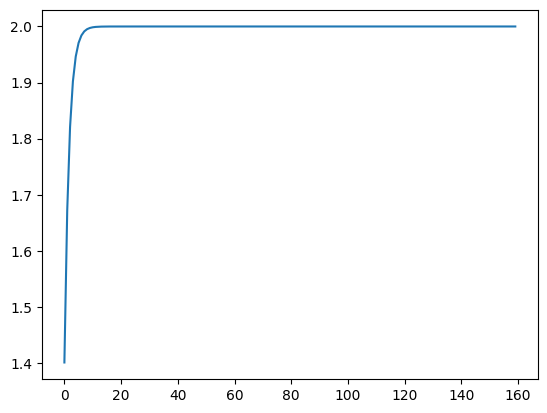

In [37]:
min_w_vect, alpha_vect = SGD(target_f, gradient_f_SGD, x, y, 0.001)
print("w= ",min_w_vect[-5:])
plt.plot(min_w_vect)
plt.show()

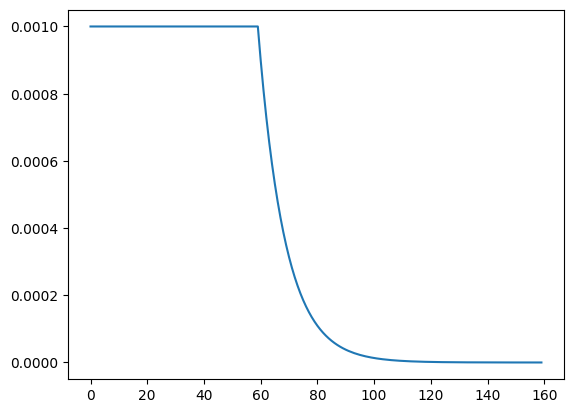

In [38]:
plt.plot(alpha_vect)
plt.show()

## Mini-batch Gradient Descent

En el código, el descenso general del gradiente por lotes se parece a esto:

```python
nb_epochs = 100
for i in range(nb_epochs):
    grad = evaluate_gradient(target_f, data, w)
    w = w - learning_rate * grad
```

Para un número predefinido de épocas, primero calculamos el vector de gradiente de la función de destino para todo el conjunto de datos w.r.t. nuestro vector de parámetros.

El descenso de gradiente estocástico (SGD), por el contrario, realiza una actualización de parámetros para cada ejemplo y etiqueta de entrenamiento:

```python
nb_epochs = 100
for i in range(nb_epochs):
    np.random.shuffle(data)
    for example in data:
        grad = evaluate_gradient(target_f, example, w)
        w = w - learning_rate * grad
```
El descenso de gradiente de minilotes finalmente toma lo mejor de ambos mundos y realiza una actualización para cada minilote de $n$ ejemplos de entrenamiento:

```python
nb_epochs = 100
for i in range(nb_epochs):
  np.random.shuffle(data)
  for batch in get_batches(data, batch_size=50):
    grad = evaluate_gradient(target_f, batch, w)
    w = w - learning_rate * grad
```

Minibatch SGD tiene la ventaja de que funciona con una estimación del gradiente ligeramente menos ruidosa. Sin embargo, a medida que aumenta el tamaño del minilote, el número de actualizaciones realizadas por cálculo realizado disminuye (eventualmente se vuelve muy ineficiente, como el descenso del gradiente del lote).

Existe una compensación óptima (en términos de eficiencia computacional) que puede variar según la distribución de datos y las particularidades de la clase de función considerada, así como la forma en que se implementan los cálculos.

## Descenso de gradiente y regresión lineal

El modelo de regresión lineal asume una relación lineal entre los datos:

$$ y_i = w_1 x_i + w_0 $$

Generemos un conjunto de datos más realista (con ruido), donde $w_1 = 2$ y $w_0 = 0$:

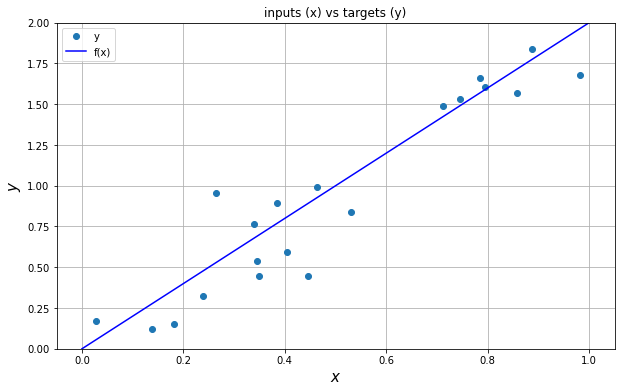

In [34]:
import numpy as np
x = np.random.uniform(0,1,20)

def f(x): return x*2

noise_variance =0.2
noise = np.random.randn(x.shape[0])*noise_variance
y = f(x) + noise

plt.plot(x, y, 'o', label='y')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((10,6))
plt.show()

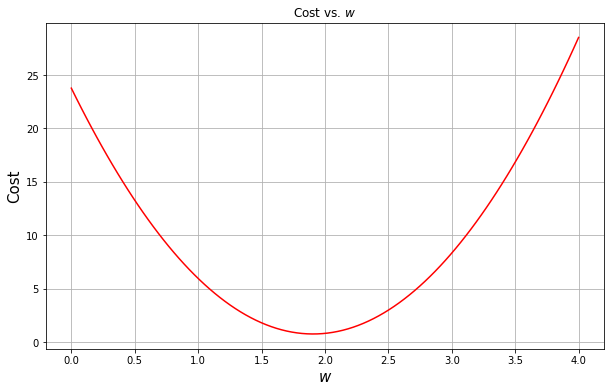

In [35]:
# Our cost function
def cost(y, t): return ((t - y)**2).sum()

ws = np.linspace(0, 4, num=100)  
cost_ws = np.zeros(ws.shape)
for ind,w in enumerate(ws):
    cost_ws[ind]=cost(x*w, y) 
    
# Ploting the cost function for different values of w
plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$w$', fontsize=15)
plt.ylabel('Cost', fontsize=15)
plt.title('Cost vs. $w$')
plt.grid()
plt.gcf().set_size_inches((10,6))
plt.show()

### Reto

Implemente el código del descenso por gradiente para la regresión lineal.

In [40]:
import numpy as np

def descenso_gradiente(X, y, learning_rate, num_iteraciones):
    num_muestras, num_caracteristicas = X.shape
    theta = np.zeros(num_caracteristicas)  # Inicializar los parámetros theta a cero

    for _ in range(num_iteraciones):
        gradientes = np.zeros(num_caracteristicas)  # Inicializar los gradientes a cero

        # Calcular los gradientes para cada parámetro theta
        for i in range(num_muestras):
            error = np.dot(X[i], theta) - y[i]
            gradientes += error * X[i]

        # Actualizar los parámetros theta utilizando el learning rate y los gradientes
        theta -= (learning_rate / num_muestras) * gradientes

    return theta

# Datos de ejemplo
X = np.array([[1, 2], [1, 3], [1, 4], [1, 5]])  # Características (incluyendo el término de sesgo)
y = np.array([3, 4, 5, 6])  # Etiquetas

# Hiperparámetros
learning_rate = 0.1
num_iteraciones = 1000

# Ejecutar el descenso por gradiente
theta_optimo = descenso_gradiente(X, y, learning_rate, num_iteraciones)

print("Parámetros óptimos:")
print(theta_optimo)

Parámetros óptimos:
[0.99988592 1.00002977]
